# 87_Clustering

### 지도학습과 비지도 학습이란 ?
- 비지도 학습 : 군집합
> - 군집 (clustering) : 비슷한 샘플을 모음
> - 이상치 탐지 (outier detection) : 정상 데이터가 어떻게 보이는지 학습, 비정상 샘플을 감지
> - 밀도 추정 : 데이터셋의 확률 밀도 함수(PDF;Probability Density Function)를 추정. 이상치 탐지 등에 사용

## K-Means
- 군집화에서 가장 일반적인 알고리즘
- 군집 중심(centroid)이라는 임의의 지점을 선택해서 해당 중심에 가장 가까운 포인트들을 선택하는 군집화
- 일반적인 군집화에서 가장 많이 사용되는 기법
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화의 정확도가 떨어짐

# K-Means 알고리즘
![k-means algorithm](/Users/newrandom/Documents/GitHub/ML_study/Zerobase_part09_머신러닝/Lecture_image/K-Means_Algorithm.png)

![k-means 원리](/Users/newrandom/Documents/GitHub/ML_study/Zerobase_part09_머신러닝/Lecture_image/K-Means_logic.png)

- 초기 중심점을 설정
- 각 데이터는 가장 가까운 중심점에 소속
- 중심점에 할당된 평균값으로 중심점 이동
- 각 데이터는 이동된 중심점 기준으로 가장 가까운 중심점에 소속
- 다시 중심점에 할당된 데이터들의 평균값으로 중심점 이동
- 데이터들의 중심점 소속 변경이 없으면 종료

In [1]:
## iris 데이터로 실습
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# cm 없애기
cols = [each[:-5] for each in iris.feature_names]
cols

['sepal length', 'sepal width', 'petal length', 'petal width']

In [4]:
iris_df = pd.DataFrame(data=iris.data, columns=cols)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
feature = iris_df[['petal length','petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [6]:
# 군집화 시작
model = KMeans(n_clusters=3)        # 3개로 나눠보라고 지시함.
                # n_clusters : 군집화할 개수, 즉, 군집 중심점의 개수
                            # init : 초기 군집 중심점의 좌표를 설정하는 방식을 결정
                                # max_iter : 최대 반복 횟수, 모든 데이터의 중심점 이동이 없으면 종료
model.fit(feature)

            ## 지금은 feature DF에 species 컬럼이 주어지지 않았다!
            # k-means는 비지도학습이다.

KMeans(n_clusters=3)

In [7]:
# 군집화라서 지도학습의 라벨과 다름.
model.labels_
## 기존의 0, 1, 2 (setosa, vergicala, verginica)로 나뉘었던 것과 다름.
## 군집 중심의 번호를 매김. // 따라서 0번이 setosa, 1번이 vergicala, 2번이 verginica 라고 단정 지으면 안된다.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [8]:
# 군집 중심값
model.cluster_centers_
# ['petal_length', 'petal_width']

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [9]:
predict = pd.DataFrame(model.predict(feature), columns=['cluster'])
feature = pd.concat([feature, predict], axis=1)
feature.head()

,petal length,petal width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


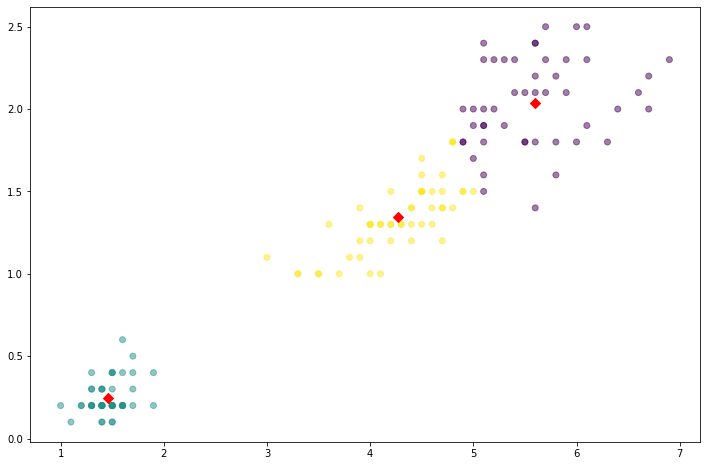

In [10]:
# 결과 확인하기
centers = pd.DataFrame(model.cluster_centers_,
                        columns=['petal length', 'petal width'])
center_x = centers['petal length']
center_y = centers['petal width']

plt.figure(figsize=(12,8))
plt.scatter(feature['petal length'], feature['petal width'],
            c = feature['cluster'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()

---------------

# make_blobs

In [11]:
# 군집화 연습을 위한 데이터 생성기
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
                                                        # cluster_std : 표준편차
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [12]:
# 데이터 정리
cluster_df = pd.DataFrame(data = X, columns=['ftr1','ftr2'])
cluster_df['target'] = y
cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


In [13]:
## 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=13)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

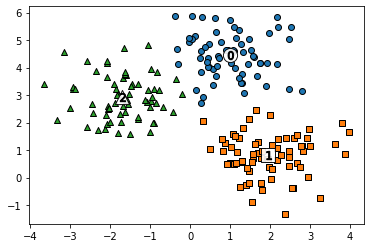

In [14]:
# 결과 도식화
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                    marker=markers[label])

    plt.scatter(x=center_x_y[0], y=center_x_y[1], s = 200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
                        # center 기호를 그림
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)
                        # center 숫자를 그림
plt.show()

In [15]:
## 결과 확인
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


-----------------

## 군집평가
- 지도학습 : 평가할 수 있다.
> - 지도학습은 크게 2가지가 있다. 회귀, 분류
> - 회귀 : 예측값과 참값 사이의 에러(mse)를 계산
> - 분류 : accuracy, f1-score 등등이 있다.

- 일반적인 군집은 답을 모르는데 어떻게 평가할 것인가?
> - 실루엣 분석

### 실루엣 분석
- 실루엣 분석은 `각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지` 나타냄
- `다른 군집과는 거리가 떨어져 있고`, `동일 군집간의 데이터는 서로 가깝게` 잘 뭉쳐 있는지 확인
- 군집화가 잘 되어 있을 수록 개별 군집은 비슷한 정도의 여유공간을 가지고 있음
- 실루엣 계수 : 개별 데이터가 가지는 군집화 지표

![실루엣분석](/Users/newrandom/Documents/GitHub/ML_study/Zerobase_part09_머신러닝/Lecture_image/silhouette.png)

# silhouette 의 n = 2 일때,
![silhouette n = 2](/Users/newrandom/Documents/GitHub/ML_study/Zerobase_part09_머신러닝/Lecture_image/silhouette_2.png)

# silhouette 의 n = 3 일때,
![silhouette n = 3](/Users/newrandom/Documents/GitHub/ML_study/Zerobase_part09_머신러닝/Lecture_image/silhouette_3.png)

# silhouette 의 n = 4 일때,
![silhouette n = 4](/Users/newrandom/Documents/GitHub/ML_study/Zerobase_part09_머신러닝/Lecture_image/silhouette_4.png)

In [5]:
# 데이터 읽기
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_lenth','petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris_df)

In [6]:
# 군집 결과 정리
iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sepal_length,sepal_width,petal_lenth,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [7]:
# 군집결과 평가를 위한 작업
from sklearn.metrics import silhouette_samples, silhouette_score

avg_value = silhouette_score(iris.data, iris_df['cluster'])
score_values = silhouette_samples(iris.data, iris_df['cluster'])

print('avg_value' , avg_value)
print('silhouette_samples(  ) return 값의 shape', score_values.shape)

avg_value 0.5528190123564095
silhouette_samples(  ) return 값의 shape (150,)


In [8]:
# 그래프 그리기
# !pip install yellowbrick

/Users/newrandom/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/newrandom/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


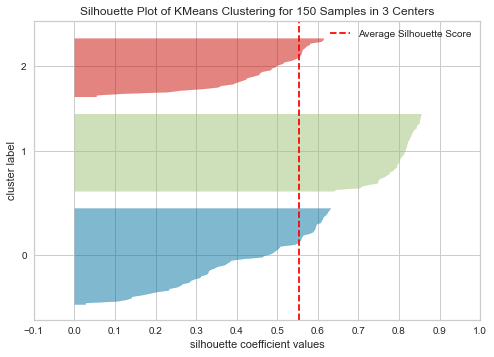

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=0))

In [13]:
# 실루엣 플롯의 결과
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(kmeans, iris.data, colors='yellowbrick')